### 1) Dataset Sizes
Find out the size of general and scientific datasets. Ideally this includes a storage need estimate
in GB, the shape of this data (e.g. language, images, video, time-series data) with the respective
dimensions. Generate a plot of the respective storage needs which shows the respective scales.

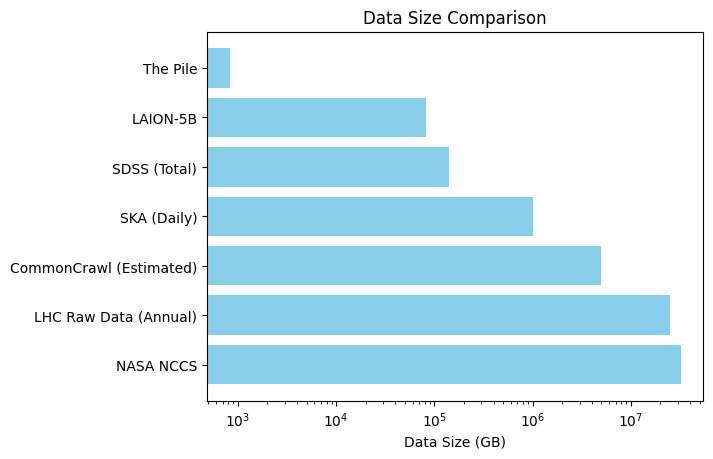

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
dataDict = {
    'NASA NCCS': 32000000,
    'LHC Raw Data (Annual)': 25000000,
    'CommonCrawl (Estimated)': 5000000,
    'SKA (Daily)': 1000000,
    'SDSS (Total)': 140000,
    'LAION-5B': 82000,
    'The Pile': 825
}

plt.barh(list(dataDict.keys()), list(dataDict.values()), color='skyblue')
plt.xlabel('Data Size (GB)')
plt.title('Data Size Comparison')
plt.xscale('log')
plt.show()


## 2 Bias vs variance trade-off
In the lectures we have discussed two schematic plots:
• Number of data points vs. Error.
• Model complexity vs. Error.
Based on the example in the lectures, perform an experiment with polynomials which shows
this behaviour. Remember this is the expected result out of many realisations

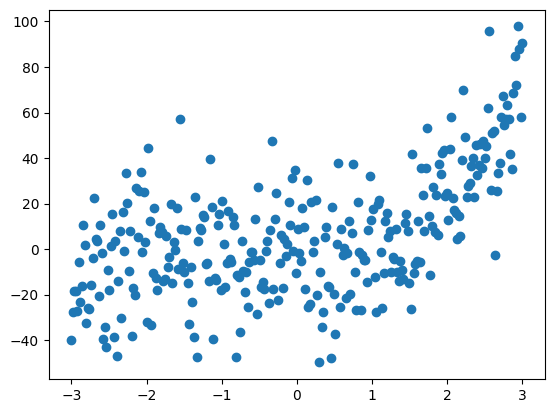

In [62]:
# create some synthetic data
N_train = 300
sigma = 20
x = np.linspace(-3, 3, N_train)
# N_train normally distributed samples
noise = np.random.randn(N_train) * sigma

def theoreticalModel(x):
    return 2 * x**3 + 3 * x**2 - 2 * x - 3

y = theoreticalModel(x) + noise

plt.plot(x, y, "o")

0.4663485672082528


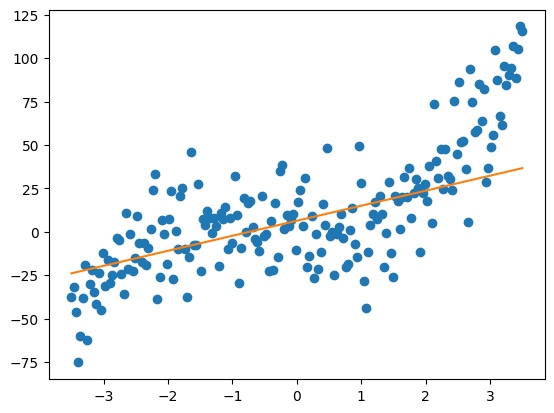

In [66]:
# linear model
fitted = linear_model.LinearRegression().fit(x[:, np.newaxis], y)

# generate some new test data
N_test = 200
noise_test = np.random.randn(N_test) * 20
x_test = np.linspace(-3.5, 3.5, N_test)
y_test = theoreticalModel(x_test) + noise_test

# check R^2 score, v bad as you expect
stats = fitted.score(x_test[:, np.newaxis], y_test)
print(stats)
plt.plot(x_test, y_test, "o")
plt.plot(x_test, fitted.predict(x_test[:, np.newaxis]))



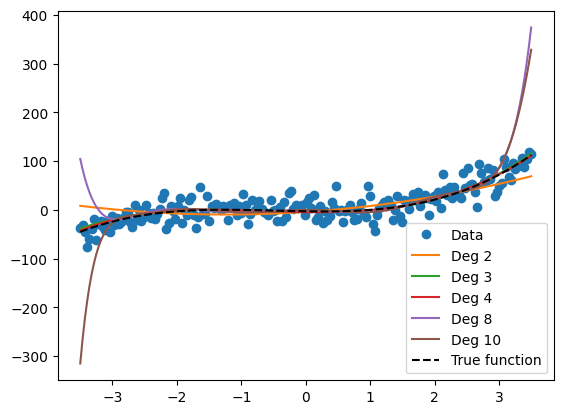

0.530170095001164
0.7301887896175235
0.7341735571107753
-0.5447243604000906
-0.8027100048456703


In [70]:
p2 = PolynomialFeatures(degree = 2)
p3 = PolynomialFeatures(degree = 3)
p4 = PolynomialFeatures(degree = 4)
p8 = PolynomialFeatures(degree = 8)
p10 = PolynomialFeatures(degree = 10)

x2 = p2.fit_transform(x[:, np.newaxis])
x3 = p3.fit_transform(x[:, np.newaxis])
x4 = p4.fit_transform(x[:, np.newaxis])
x8 = p8.fit_transform(x[:, np.newaxis])
x10 = p10.fit_transform(x[:, np.newaxis])

pm2 = linear_model.LinearRegression()
pm2.fit(x2, y)

pm3 = linear_model.LinearRegression()
pm3.fit(x3, y)

pm4 = linear_model.LinearRegression()
pm4.fit(x4, y)

pm8 = linear_model.LinearRegression()
pm8.fit(x8, y)

pm10 = linear_model.LinearRegression()
pm10.fit(x10, y)

plt.plot(x_test, y_test, "o")
plt.plot(
    x_test,
    pm2.predict(
        p2.fit_transform(x_test[:, np.newaxis])
        )
    )
plt.plot(
    x_test,
    pm3.predict(
        p3.fit_transform(x_test[:, np.newaxis])
    )
)
plt.plot(
    x_test,
    pm4.predict(
        p4.fit_transform(x_test[:, np.newaxis])
    )
)
plt.plot(
    x_test,
    pm8.predict(
        p8.fit_transform(x_test[:, np.newaxis])
    )
)
plt.plot(
    x_test,
    pm10.predict(
        p10.fit_transform(x_test[:, np.newaxis])
    )
)
plt.plot(x_test, theoreticalModel(x_test), "k--", label="True function")
plt.legend(["Data", "Deg 2", "Deg 3", "Deg 4", "Deg 8", "Deg 10", "True function"])
plt.show()

print(pm2.score(p2.fit_transform(x_test[:, np.newaxis]), y_test))
print(pm3.score(p3.fit_transform(x_test[:, np.newaxis]), y_test))
print(pm4.score(p4.fit_transform(x_test[:, np.newaxis]), y_test))
print(pm8.score(p8.fit_transform(x_test[:, np.newaxis]), y_test))
print(pm10.score(p10.fit_transform(x_test[:, np.newaxis]), y_test))




## 3 Gradient descent – Adam

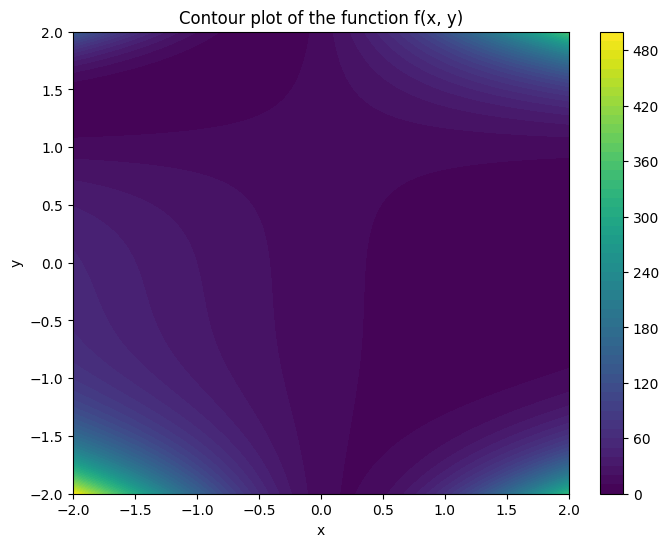

In [76]:
def f(x, y):
  """
  Calculates the value of the function f(x, y) from the exercise.
  """
  term1 = (1.5 - x + x * y)**2
  term2 = (2.25 - x + x * y**2)**2
  term3 = (2.625 - x + x * y**3)**2
  return term1 + term2 + term3

plt.figure(figsize=(8, 6))
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contour plot of the function f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()